# Comparison Between GT Trajectory and Multi-Step Predictions

*Created by Xinyi 02.02.2023* 


This short report is devided into following sections:

1. Import data from prediction data csv file and GT csv file

2. Use time intepolation to syncronize the time stamp

3. Map vehicles from GT veh id to prediction veh id

4. program 3 criteria:

    - ADE
    
    - FDE
    
    - ROC (should have a better name) 

##  Import Data

### GT data

first, take a look at what our GT data look like:


In [1]:
from dataImport import * 

import matplotlib.pyplot as plt

In [2]:
# get t, veh_id, pos.x, pos.y
def getGTData(filename):
    file = open(filename, 'r')
    dat_str = file.readlines()
    data = np.zeros([len(dat_str), 4])
    for i in range(len(dat_str)):
        sample = dat_str[i].split(' ')
#         print(sample)
        if len(sample) != 4:
            print ('!check at line ', str(i), ' of file ', str(filename))
        else:
            
            t, veh_id, x, y= (float(sample[i]) for i in range(4))
            
            data[i, :] = t, veh_id, x, y
    return data


# fn_GT = "t_jun_pred_2_results/t_jun_pred_2_gt.csv"
# fn_pred = "t_jun_pred_2_results/t_jun_pred_2_pred.csv"

fn_GT = "t_jun_pred_3_results/t_jun_pred_3_gt.csv"
# fn_pred = "t_jun_pred_3_results/t_jun_pred_3_pred.csv"

GT = getGTData(fn_GT)
GT.shape

(2543, 4)

12


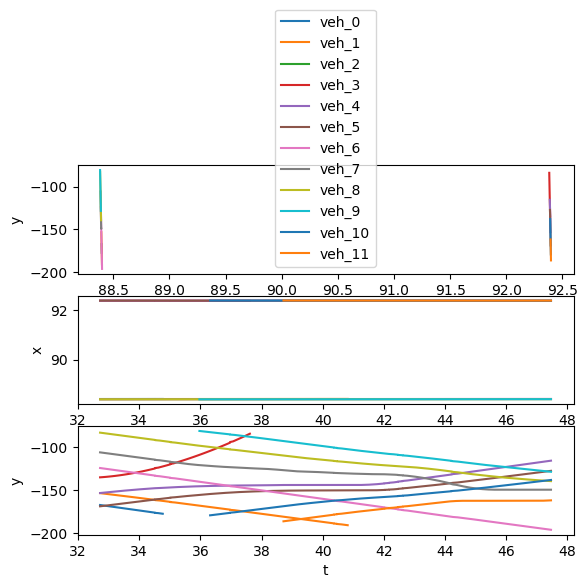

In [3]:
# let's visualize the GT data first

max_n = int(max(GT[:,1]))
print(max_n)

fig1 = plt.figure(1)
                
fig1.clf()
ax1 = fig1.add_subplot(311) 
ax2 = fig1.add_subplot(312) 
ax3 = fig1.add_subplot(313) 
check = 20 # 10-15 benignly consistant, others abnormal          
for i in range(max_n):
# for i in range(7,12):
    gt_traj = GT[GT[:,1] == float(i)]
    ax1 .plot(gt_traj[:,2], gt_traj[:,3], label = "veh_"+str(i))
    if i == check :
        ax1.scatter(gt_traj[:,2], gt_traj[:,3])
    ax1 .legend()
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax2.plot(gt_traj[:,0], gt_traj[:,2], label = "veh_"+str(i))
    if i == check :
        ax2.scatter(gt_traj[:,0], gt_traj[:,2])
#     ax2.legend()
    ax2.set_xlabel("t")
    ax2.set_ylabel("x")
    ax3.plot(gt_traj[:,0], gt_traj[:,3], label = "veh_"+str(i))
    if i == check :
        ax3.scatter(gt_traj[:,0], gt_traj[:,3])
#     ax3.legend()
    ax3.set_xlabel("t")
    ax3.set_ylabel("y")
    
    #  we need to reassign the vehicles based on the continuity of the trajectory first 
    # might save time solving in the collection side ...
    
    # update: still has bugs in bag2csv_gt.py: when an vehicle exit, the index should be deleted from the dictionary, or time restrictions should be added
    



## Prediction Data

In [4]:
# get t_start,dt,n_pred,i | xs,ys,dxs, dys
def getPredData(filename):
    file = open(filename, 'r')
    dat_str = file.readlines()
    
    sample = dat_str[0].split(' ')
    n_pred= int(sample[2])
    width = 4+4*n_pred
    print(width)       
    data = np.zeros([len(dat_str), width]) 
    for i in range(len(dat_str)):
        sample = dat_str[i].split(' ')
        data[i, :] = sample
            
    return data


fn_pred = "t_jun_pred_3_results/t_jun_pred_3_pred.csv"
PRED = getPredData(fn_pred)
PRED.shape

408


(1231, 408)

39


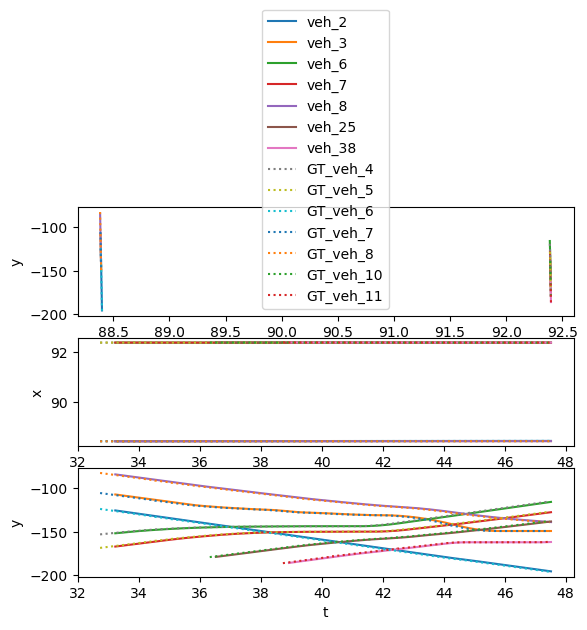

In [5]:
# let's draw a similar plot on prediction
max_n = int(max(PRED[:,3]))
print(max_n)

fig2= plt.figure(2)
                
fig2.clf()
ax4 = fig2.add_subplot(311) 
ax5 = fig2.add_subplot(312) 
ax6 = fig2.add_subplot(313) 
dt = PRED[0, 1]
n_pred = int(PRED[0,2])
last_seen = [2,3,6,7,8,25,38]
# for i in range(1,30):
for i in last_seen:
    pred_data = PRED[PRED[:,3] == float(i)] # t_start,dt,n_pred,i | xs,ys,dxs, dys
    # print the first prediction
    x1 = pred_data[:,4] 
    y1 = pred_data[:,4 + n_pred] 
    pred_t = dt + pred_data[:, 0]
    ax4.plot(x1,y1,label = "veh_"+str(i))
#     if i == check :
#         ax1.scatter(gt_traj[:,2], gt_traj[:,3])
    ax4 .legend()
    ax4.set_xlabel("x")
    ax4.set_ylabel("y")
    ax5.plot(pred_t,x1 , label = "veh_"+str(i))
#     if i == check :
#         ax2.scatter(gt_traj[:,0], gt_traj[:,2])
#     ax5.legend()
    ax5.set_xlabel("t")
    ax5.set_ylabel("x")
    ax6.plot(pred_t,y1 , label = "veh_"+str(i))
#     if i == check :
#         ax3.scatter(gt_traj[:,0], gt_traj[:,3])
#     ax6.legend()
    ax6.set_xlabel("t")
    ax6.set_ylabel("y")

    
add_gt = True    
if add_gt:    
    max_n = int(max(GT[:,1]))
    gt_sel = (4,5,6,7,8,10,11)
    for i in gt_sel:
    # for i in range(7,12):
        gt_traj = GT[GT[:,1] == float(i)]
        ax4 .plot(gt_traj[:,2], gt_traj[:,3], ':', label = "GT_veh_"+str(i))
        ax4 .legend()
        ax4.set_xlabel("x")
        ax4.set_ylabel("y")
        ax5.plot(gt_traj[:,0], gt_traj[:,2],':', label = "GT_veh_"+str(i))
        ax5.set_xlabel("t")
        ax5.set_ylabel("x")
        ax6.plot(gt_traj[:,0], gt_traj[:,3],':', label = "GT_veh_"+str(i))
        ax6.set_xlabel("t")
        ax6.set_ylabel("y")

plt.show()

In [6]:
# we can assign the ids by hands:
id_pred2gt = {}               
id_pred2gt[2] = 6
id_pred2gt[3] = 7
id_pred2gt[6] = 4
id_pred2gt[7] = 5
id_pred2gt[8] = 8
id_pred2gt[25] = 10
id_pred2gt[38] = 11   

id_gt2pred = {}               
id_gt2pred[6] = 2
id_gt2pred[7] = 3
id_gt2pred[4] = 6
id_gt2pred[5] = 7
id_gt2pred[8] = 8
id_gt2pred[10] = 25
id_gt2pred[11] = 38   

## Definition of Criteria 

### ADE:

- For each selected GT trajectory (gt_id):

    - For each pt on that GT trajectory:
       
        - Count how many prediction trajectories' time range covers the time stamp of this GT point 
        - For each prediction trajectory:
            - Calulate a linear interpolation on that GT point
            - store it in order of predicted length in a list, which direct to the GT point
            

### FDE: 

- For each selected GT trajectory's end point (gt_id):

    - Count how many prediction trajectories' time range covers the time stamp of this GT point 
    - For each prediction trajectory:
        - Calulate a linear interpolation on that GT point
        - store it in order of predicted length in a list, which direct to the GT point
        
        